# Post processing the Offshore ABL case

In [1]:
%%capture 

# Important libraries header information
# ----------------------------------

# change this directory as necessary
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

# Load the libraries
import matplotlib.pyplot as plt
import amrwind_frontend  as amrwind
import numpy             as np
from matplotlib import cm
import re
import time

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
def plotrotorlines(zhh, rotorD, xstart, xend, **kwargs):
    plt.hlines(zhh,             xstart, xend, linewidth=1.0, **kwargs) # Plot the HH line
    plt.hlines(zhh+rotorD*0.5,  xstart, xend, linewidth=0.5, **kwargs) # Plot the HH line
    plt.hlines(zhh-rotorD*0.5,  xstart, xend, linewidth=0.5, **kwargs) # Plot the HH line    

## Postprocess and compare AMR-Wind velocity profiles

In [3]:
 # Set your run directory here
casedir = '/gpfs/drhouck/AWAKEN/JRSE_Precursor/'

caselist = [ 
           #{'rundir':casedir+'z0_0p1_temp_0/', 'tag':'(0.1)',
           # 'inputfile':'AMRWind_precursor1.inp',
           # 'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[15000, 20000],
           # 'mstyle':{'mfc':'b', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'b'}},  
           #{'rundir':casedir+'z0_0p2_temp_0/', 'tag':'(0.2)',
           # 'inputfile':'AMRWind_precursor1.inp',
           # 'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[15000, 20000],
           # 'mstyle':{'mfc':'r', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'r'}}, 
           #{'rundir':casedir+'z0_0p05_temp_0/', 'tag':'(0.05)',
           # 'inputfile':'AMRWind_precursor1.inp',
           # 'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[15000, 20000],
           # 'mstyle':{'mfc':'g', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'g'}}, 
           #{'rundir':casedir+'z0_0p02_temp_0/', 'tag':'(0.02)',
           # 'inputfile':'AMRWind_precursor1.inp',
           # 'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[15000, 20000],
           # 'mstyle':{'mfc':'y', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'y'}},
           #{'rundir':casedir+'ws_6p2_z0_0p02_temp_0/', 'tag':'(0.02)',
           # 'inputfile':'AMRWind_precursor1.inp',
           # 'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[15000, 20000],
           # 'mstyle':{'mfc':'c', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'c'}},
           #{'rundir':casedir+'ws_6p2_z0_0p03_temp_0/', 'tag':'(0.03)',
           # 'inputfile':'AMRWind_precursor1.inp',
           # 'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[15000, 20000],
           # 'mstyle':{'mfc':'m', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'m'}},
           {'rundir':casedir+'newmesh/z0_0p03-at/', 'tag':'AMR-Wind z0=0.03',
            'inputfile':'precursor_5x5.inp',
            #'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[15000, 20000],
            'ncfile':'post_processing/abl_statistics80000.nc', 'avgtimes':[20000, 25000],
            'mstyle':{'mfc':'y', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'y'}},
           ]

# Average between 15,000 sec to 20,000 sec
avgtimes = [20000, 25000] #[15000, 20000]

# Hub-height locations
plotheights=[26.5, 90, 153.5]

# Load the entire netcdf in memory
loadinmemory = False   # Do this only if there's enough RAM and for new (python 3+ netCDF4) libraries

In [4]:
for case in caselist:
    case['App'] = amrwind.MyApp.init_nogui()
    tstart = time.time()
    case['App'].ABLpostpro_loadnetcdffile(case['rundir']+'/'+case['ncfile'], usemmap=loadinmemory)
    tend   = time.time()
    print("Load time: %f sec"%(tend-tstart))

Loading /gpfs/drhouck/AWAKEN/JRSE_Precursor/newmesh/z0_0p03-at//post_processing/abl_statistics80000.nc
Time range: 20000.250000 to 25000.000000
Done.
Load time: 18.800759 sec


In [5]:
# First, let's look at the averaged statistics
for case in caselist:
    tstart = time.time()
    case['reportstats'] = case['App'].ABLpostpro_printreport(avgt=case['avgtimes'], avgz=list(plotheights),span=(40,140))
    tend   = time.time()
    print("Compute time: %f sec"%(tend-tstart))
    # edit with option from stable notebook to add a span to average over

Loading u'u'_r
Loading theta
Loading v'v'_r
Loading u
Loading w'w'_r
Loading v
Loading w'theta'_r
        z       Uhoriz      WindDir       TI_TKE     TI_horiz        Alpha    Alpha-Fit     ObukhovL         Veer     Veer-Fit 
      ===         ====         ====         ====         ====         ====         ====         ====         ====         ==== 
    26.50 5.323903e+00 2.685117e+02 8.520305e-02 1.415833e-01 1.374675e-01 1.185312e-01 1.628655e+05 2.695410e-02 1.951836e-02 
    90.00 6.264782e+00 2.700006e+02 6.261624e-02 9.739703e-02 1.121706e-01 1.185312e-01 3.865131e+04 1.855527e-02 1.951836e-02 
   153.50 6.694283e+00 2.710819e+02 5.393951e-02 8.289388e-02 1.313620e-01 1.185312e-01 2.242668e+04 1.598644e-02 1.951836e-02 

ustar: 0.289809
Compute time: 105.969119 sec


In [6]:
# Let's compute the shear based on z=10m and z=169m
z_lr = 26.5
z_ur = 153.5
print("%10s %10s %10s %10s"%("CASE", "LR-HH", "LR-UR", "HH-UR"))
for case in caselist:
    ULR  = case['reportstats']['Uhoriz'][0]
    UHH  = case['reportstats']['Uhoriz'][1]
    UUR  = case['reportstats']['Uhoriz'][2]
    case['alpha_LR_HH']  = alpha_LR_HH  = np.log(ULR/UHH)/np.log(z_lr/90.0)
    case['alpha_LR_UR']  = alpha_LR_UR  = np.log(ULR/UUR)/np.log(z_lr/z_ur)
    case['alpha_HH_UR']  = alpha_HH_UR  = np.log(UHH/UUR)/np.log(90.0/z_ur)
    # copy the power law fit from the stable notebook and apply between 40 and 140 m
    #case['reportstats'] = case['App'].ABLpostpro_printreport(avgt=case['avgtimes'], avgz=list(plotheights),span=(40,140))
    #print("%s alpha_10_169 = %f"%(case['tag'], alpha_60_91))
    print("%10s % 10f % 10f % 10f"%(case['tag'], alpha_LR_HH, alpha_LR_UR, alpha_HH_UR))

      CASE      LR-HH      LR-UR      HH-UR
AMR-Wind z0=0.03   0.133100   0.130396   0.124202


## Target values

In [7]:
# These values came from Mithu's post-processed ARM data - Stable
ARM_alpha = 0.11622
ARM_TI    = 0.098221
ARM_WS    = 6.265
ARM_zHH   = 90.0
rotorD    = 127.0

## Parameters used in the cases

In [8]:
# Make a table of the relevant parameters
QOIs = ['ABL.surface_roughness_z0', 'ABL.surface_temp_rate']
for case in caselist:
    case['App'].loadAMRWindInput(case['rundir']+'/'+case['inputfile'])
    for q in QOIs:
        case[q] = case['App'].getAMRWindInput(q)

print()
print('%20s'%'CASE', end='')
for q in QOIs: print('%30s '%q,end='')
print()
print('%20s'%'----', end='')
for q in QOIs: print('%30s '%'-----',end='')
print()
for case in caselist:
    print('%20s'%case['tag'], end='')
    for q in QOIs: 
        print('%30.4f '%case[q],end='')
    print()

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()

                CASE      ABL.surface_roughness_z0          ABL.surface_temp_rate 
                ----                         -----                          ----- 
    AMR-Wind z0=0.03                        0.0300                         0.0000 


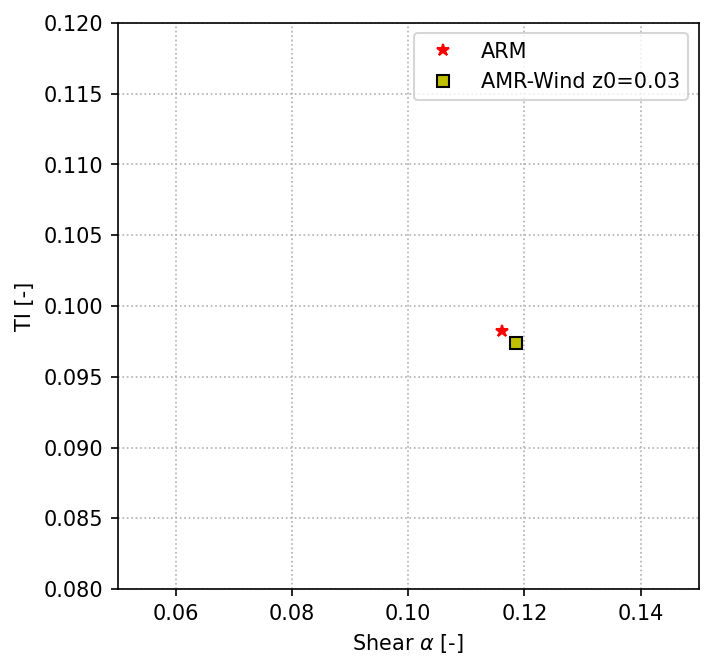

In [9]:
fig, ax = plt.subplots(figsize=(5,5), facecolor='w', dpi=150)

# Plot the ARM data
plt.plot(ARM_alpha, ARM_TI, 'r*', label='ARM')

# Plot the AMR-Wind results
for case in caselist:
    mstyle=case['mstyle']
    #plt.plot(case['reportstats']['Alpha'][3], case['reportstats']['TI_horiz'][2], label=case['tag'], **mstyle)
    #plt.plot(case['alpha_30_169'], case['reportstats']['TI_horiz'][2], label=case['tag'], **mstyle)
    #plt.plot(case['alpha_60_91'], case['reportstats']['TI_horiz'][2], label=case['tag'], **mstyle)
    plt.plot(case['reportstats']['Alpha-Fit'][1], case['reportstats']['TI_horiz'][1],  label=case['tag'],**mstyle)

#plt.xlim([0.25, 0.45])
plt.xlim([0.05, 0.15])
plt.ylim([0.08, 0.12])
plt.xlabel(r'Shear $\alpha$ [-]')
plt.ylabel('TI [-]')
plt.grid(ls=':')
plt.legend()

## Plot velocity profile

Loading u
Loading v


Text(0.5, 1.0, 'Horizontal wind speed')

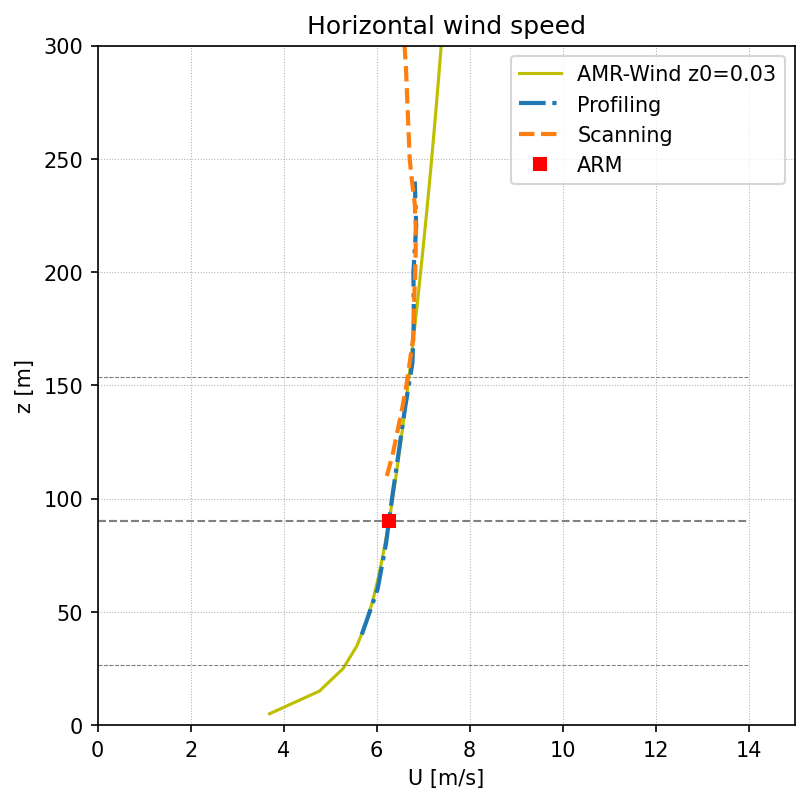

In [10]:
# Plot velocity
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)


# This command returns the data, and then you can plot it individually
for case in caselist:
    amrdat = case['App'].ABLpostpro_plotprofiles(plotvars=['Uhoriz'], avgt=case['avgtimes'])
    lstyle=case['lstyle']
    plt.plot(amrdat['Uhoriz']['data'], amrdat['Uhoriz']['z'], label=case['tag'], **lstyle)

# Plot the turbine dimensions
plotrotorlines(ARM_zHH, rotorD, 0, 14, linestyles='dashed', color='gray',)

# Load and plot the lidar data
WS_profiling = np.loadtxt('Profiles_WindSpeed_a1_selectedcase_profiling.txt',delimiter=',')
WS_scanning  = np.loadtxt('Profiles_WindSpeed_a1_selectedcase_scanning.txt',delimiter=',')    
plt.plot(WS_profiling[:,0], WS_profiling[:,1], '-.', label='Profiling', lw=2)
plt.plot(WS_scanning[:,0],  WS_scanning[:,1],  '--', label='Scanning', lw=2)
    
# Plot the turbine dimensions
plotrotorlines(ARM_zHH, rotorD, 0, 1, linestyles='dashed', color='gray',)

ax.plot(ARM_WS, ARM_zHH, 's', color='r', label='ARM')
ax.legend()
ax.set_xlim([0, 15])
ax.set_xlabel('U [m/s]')
ax.grid(linestyle=':', linewidth=0.5)
ax.set_ylim([0,300])
ax.set_ylabel('z [m]')
ax.set_title('Horizontal wind speed')

# Compare AMR-Wind temperature profiles

Loading theta


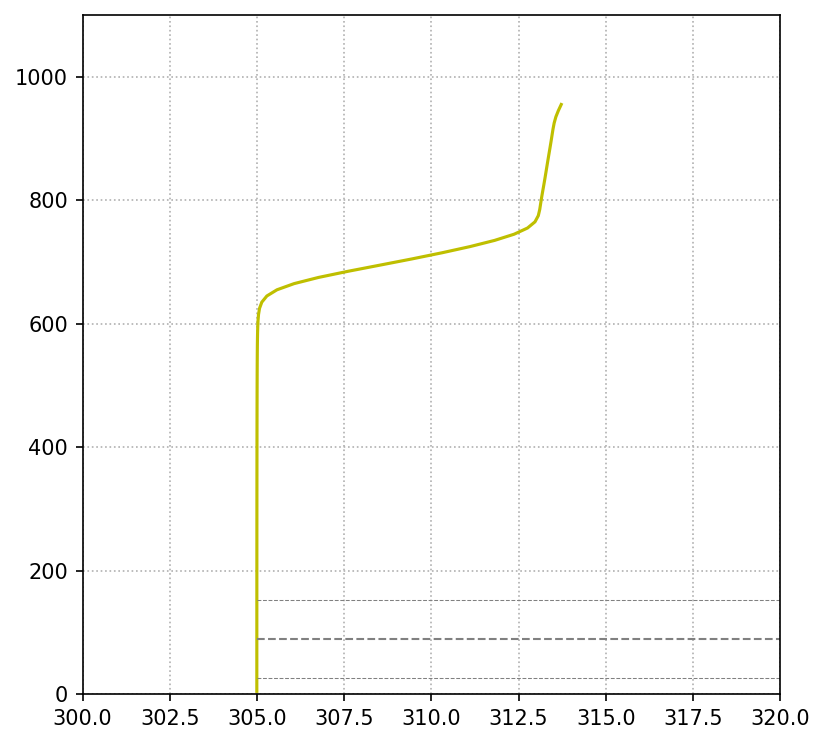

In [11]:
# Plot temperature
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
for case in caselist:
    amrdat = case['App'].ABLpostpro_plotprofiles(plotvars=['Temperature'], avgt=case['avgtimes'])
    lstyle=case['lstyle']
    plt.plot(amrdat['T']['data'], amrdat['T']['z'], label=case['tag'], **lstyle)

# Plot the turbine dimensions
plotrotorlines(ARM_zHH, rotorD, 305, 320, linestyles='dashed', color='gray',)

plt.ylim([0, 1100])
plt.xlim([300, 320])
plt.grid(ls=':')

# Compare AMR-Wind veer profiles

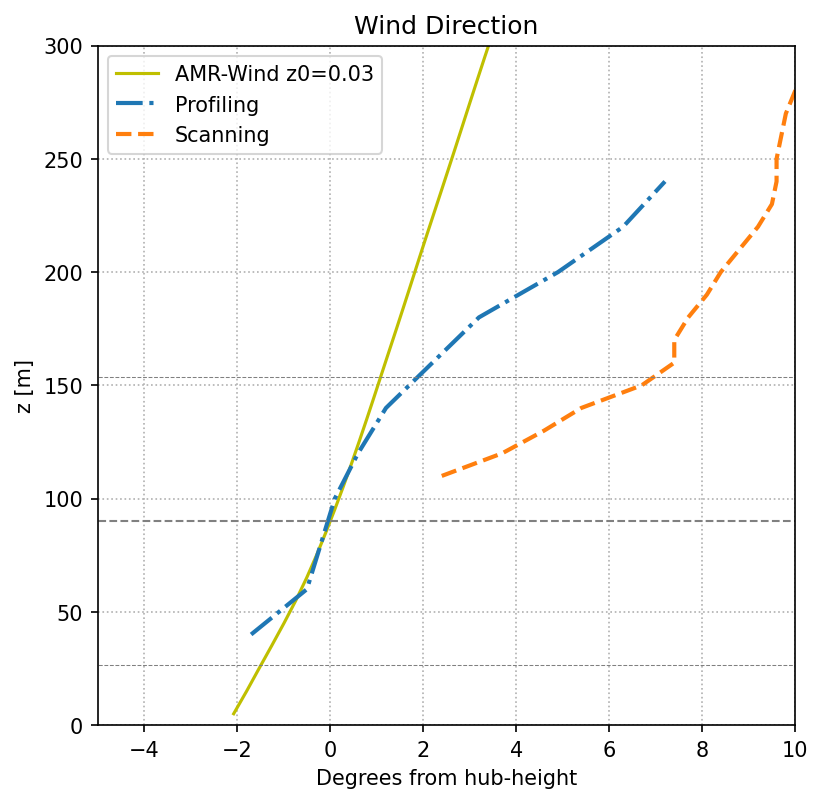

In [14]:
# Plot veer
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
for case in caselist:
    amrdat = case['App'].ABLpostpro_plotprofiles(plotvars=['WindDir'], avgt=case['avgtimes'])
    lstyle=case['lstyle']
    plt.plot(amrdat['WindDir']['data']-270.0, amrdat['WindDir']['z'], label=case['tag'], **lstyle)

# Load and plot the lidar data
WD_profiling = np.loadtxt('Profiles_WindDirection_a1_selectedcase_profiling.txt',delimiter=',')
WD_scanning  = np.loadtxt('Profiles_WindDirection_a1_selectedcase_scanning.txt',delimiter=',')    
plt.plot(WD_profiling[:,0]-131, WD_profiling[:,1], '-.', label='Profiling', lw=2)
plt.plot(WD_scanning[:,0]-131,  WD_scanning[:,1],  '--', label='Scanning', lw=2)

# Plot the turbine dimensions
plotrotorlines(ARM_zHH, rotorD, -10, 290, linestyles='dashed', color='gray',)

#plt.ylim([0, 1100]) #[0, 2000]
#plt.xlim([260, 290]) #[170, 190]

ax.set_ylabel('z [m]')
ax.set_xlabel('Degrees from hub-height')
plt.ylim([0, 300])
plt.xlim([-5, 10])
plt.grid(ls=':')
plt.title('Wind Direction')
plt.legend()

Loading u
Loading v
Loading u'u'_r
Loading v'v'_r


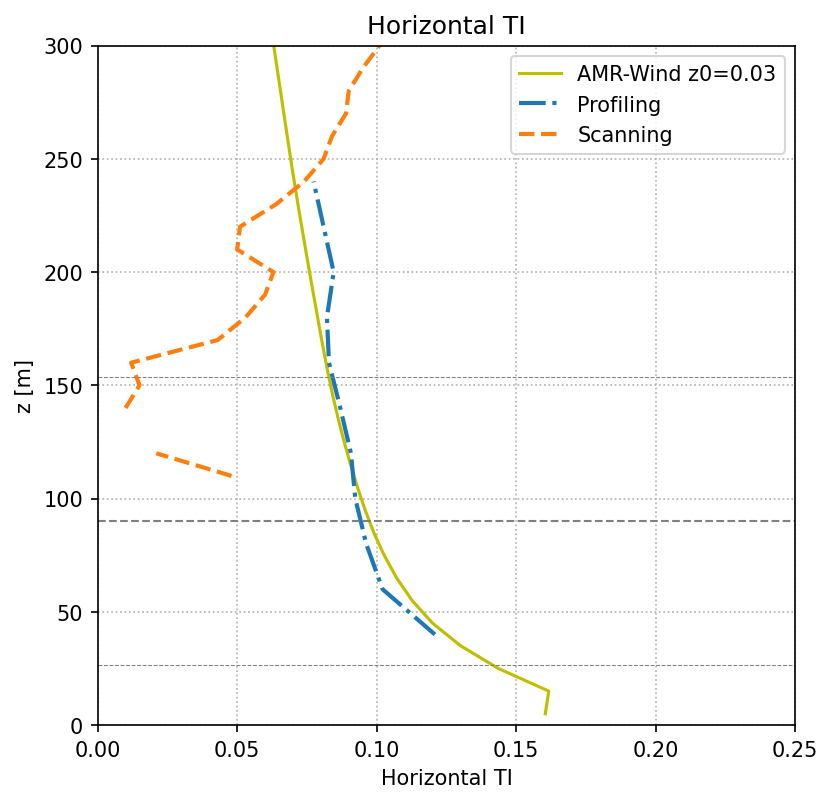

In [13]:
# Plot TI
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
for case in caselist:
    amrdat = case['App'].ABLpostpro_plotprofiles(plotvars=['TI_horiz'], avgt=case['avgtimes'])
    lstyle=case['lstyle']
    plt.plot(amrdat['TI_horiz']['data'], amrdat['TI_horiz']['z'], label=case['tag'], **lstyle)

# Load and plot the lidar data
TI_profiling = np.loadtxt('Profiles_TurbInt_a1_selectedcase_profiling.txt',delimiter=',')
TI_scanning  = np.loadtxt('Profiles_TurbInt_a1_selectedcase_scanning.txt',delimiter=',')
    
plt.plot(TI_profiling[:,0], TI_profiling[:,1], '-.', label='Profiling', lw=2)
plt.plot(TI_scanning[:,0],  TI_scanning[:,1],  '--', label='Scanning', lw=2)
    
# Plot the turbine dimensions
plotrotorlines(ARM_zHH, rotorD, 0, 1, linestyles='dashed', color='gray',)

#plt.ylim([0, 1100])
plt.ylim([0, 300])
plt.xlim([0, .25])
plt.grid(ls=':')
ax.set_ylabel('z [m]')
ax.set_xlabel('Horizontal TI')
ax.set_title('Horizontal TI')
plt.legend()